In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# only no-pair number for variable size
data = np.random.randint(50, size =(50))
size = int(raw_input('input size window: '))
print data

input size window: 3
[10 11 22 22 33 17 30 39 42 12  5  7  8 44 13 19 13 30 33 44 16 16 18 46 37
 17 26 18 16 10 38 21 23 41 12 19 31 48 11  4 17 31 14 10 23 39  0 15 49 15]


In [67]:
def move_window_mean(arr,size_win):
    temp = range(len(arr)-(size_win/2)*2)
    return np.array(map(lambda x:np.mean(arr[x:size_win+x]),temp))

def move_window_median(arr,size_win):
    temp = range(len(arr)-(size_win/2)*2)
    return np.array(map(lambda x:np.median(arr[x:size_win+x]),temp))

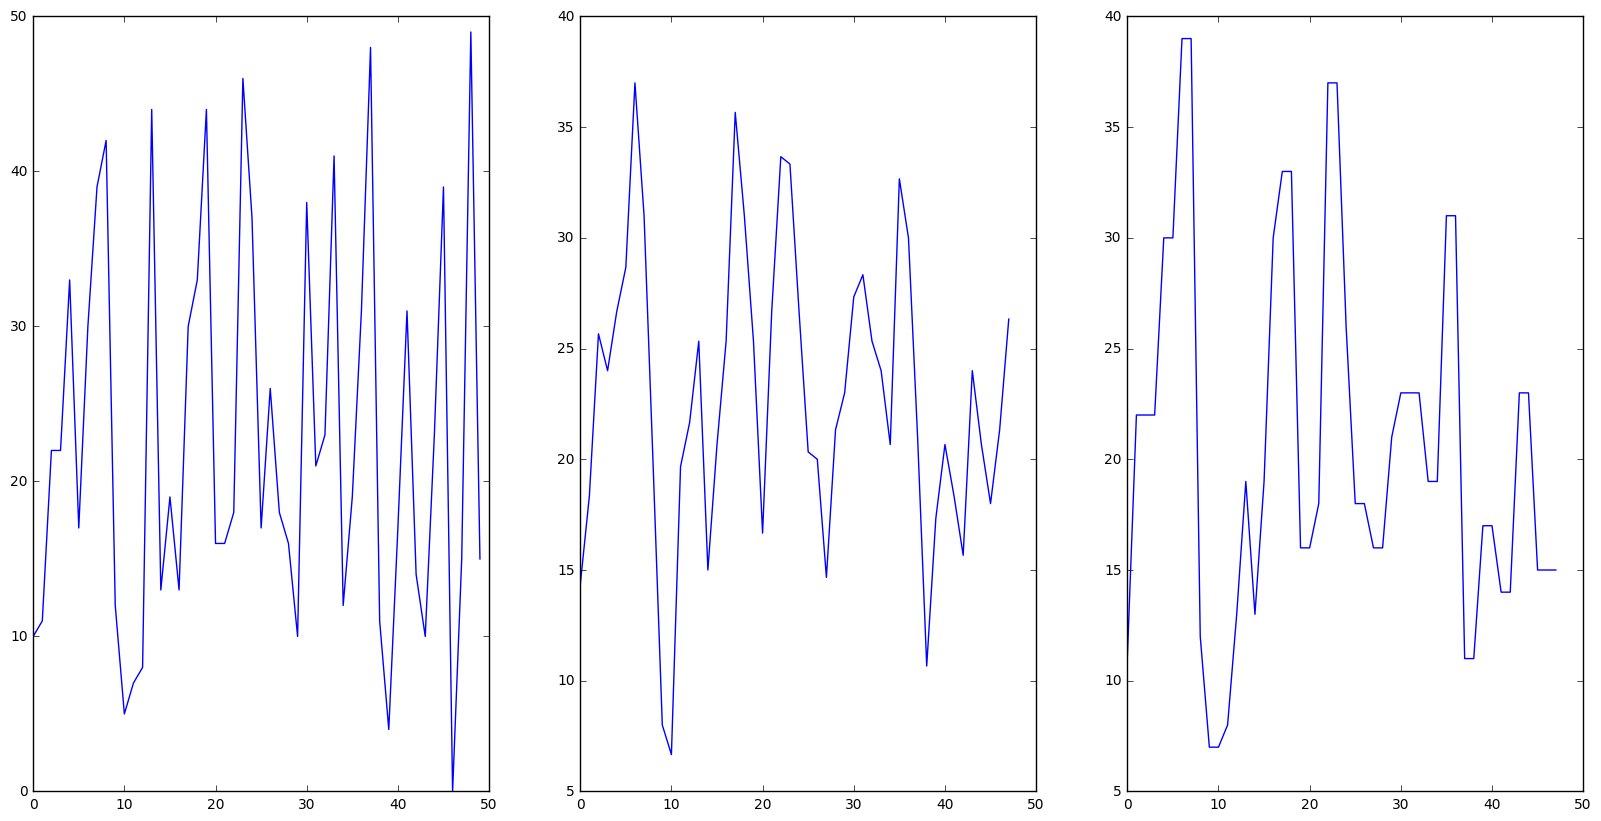

[10 11 22 22 33 17 30 39 42 12  5  7  8 44 13 19 13 30 33 44 16 16 18 46 37
 17 26 18 16 10 38 21 23 41 12 19 31 48 11  4 17 31 14 10 23 39  0 15 49 15]
[ 14.33333333  18.33333333  25.66666667  24.          26.66666667
  28.66666667  37.          31.          19.66666667   8.           6.66666667
  19.66666667  21.66666667  25.33333333  15.          20.66666667
  25.33333333  35.66666667  31.          25.33333333  16.66666667
  26.66666667  33.66666667  33.33333333  26.66666667  20.33333333  20.
  14.66666667  21.33333333  23.          27.33333333  28.33333333
  25.33333333  24.          20.66666667  32.66666667  30.          21.
  10.66666667  17.33333333  20.66666667  18.33333333  15.66666667  24.
  20.66666667  18.          21.33333333  26.33333333]
[ 11.  22.  22.  22.  30.  30.  39.  39.  12.   7.   7.   8.  13.  19.  13.
  19.  30.  33.  33.  16.  16.  18.  37.  37.  26.  18.  18.  16.  16.  21.
  23.  23.  23.  19.  19.  31.  31.  11.  11.  17.  17.  14.  14.  23.  23.
  15.  15

In [71]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
arr = move_window_mean(data,size)
arr_1 = move_window_median(data,size)
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.plot(data)
ax2.plot(arr)
ax3.plot(arr_1)
plt.show()
print data
print arr
print arr_1

In [53]:
print arr

[ 19.  24.  44.  44.  31.  21.  31.  20.  20.  16.  16.  32.  32.  32.  35.
  35.  20.  20.  19.  43.  40.  43.  40.  28.  27.  15.  15.  30.  32.  32.
  15.  15.  29.  29.  32.   9.  21.   9.  14.   3.  14.  17.  39.  39.  33.
  33.  33.  20.]
